<h1>Is postgraduate degree necessary to be a Data Scientist?</h1>

<h1>Introduction</h1>

Data science is an interdisciplinary field which combines the power of statistics and computer science to make sense of massive stores of data. Companies are willing to pay top dollar for experts that can assist with decision making using data. Data science is a profession which requires its practitioners to be skilled in multiple areas such as programming and statistics to name a few <i>(Oracle.com, 2014)</i>. For this reason, prerequisites outlined by companies for data professional positions can be very daunting to the aspiring data professional.

To further emphasize on the subject, below are posts about an open data science position at Google <i>[ref in ass1]</i> and Facebook <i>[ref in ass1].</i>

<b>Minimum Qualifications in Google</b>

- Master’s degree in Operations Research, Industrial Engineering, Statistics, related field, or equivalent practical experience.
- 2 years of relevant work experience (example, as a data scientist) or equivalent. Analytical engagements outside class work while at school can also be included.
- Experience with statistical software (example R, Python) and database languages (e.g. SQL)

<b>Preferred Qualifications</b>

- PhD in Operations Research, Industrial Engineering, Statistics or related field.
- 4 years of relevant work experience( e.g. as a data scientist), including experience applying advanced analytics to planning and infrastructure problems.
- Experience designing and building statistical forecasting models.
- Experience designing and building machine learning models.
- Excellent problem-framing, problem-solving and project management skills.

<b>Minimum Qualifications at Facebook</b>

- 5+ years of hands-on data science experience, Data analysis skill, willing to get your hands dirty with data.
- Expert knowledge of SQL, Python, R.
- Experience on working with multiple cross functional partners and influence decision making based on data.
- Experience initiating and driving projects to completion with minimal guidance.
- Experimentation – AB testing.



<b>Preferred Qualifications</b>

- Educational background in Computer Science, Math, Physics, Engineering, or related quantitative field.
- Expert in experimentation.
- Experience with large data sets and distributed computing (Hive/Hadoop).
- Exposure to large scale infrastructure systems, comfortable with technical discussions.
- Excellent customer service and team collaboration skills.

Perhaps, the prerequisites aforementioned involve having high educational qualifications because the companies in question are Google and Facebook. This project seeks to determine if most data scientists possess at least a postgraduate degree using statistical methods. The project also seeks to find the proportion of data science professionals currently working in industry that possess a postgraduate degree in fields such as computer science, statistics, engineering, mathematics or any related field. The prerequisites aforementioned by Google and Facebook will then be evaluated against the project findings. The results garnered from this project can also help aspirants prepare for their future.

<br/>

<h1>Data Curation</h1>

LinkedIn is a very popular social website for professionals in all fields. The purpose of LinkedIn is to engender social networking and career development <i>(Johnson, n.d.)</i>. The data about randomly selected professionals are scraped using the python programming language. This section describes how the language is used to create the second dataset.

<h3>API Design</h3>

The data curation process heavily relies on the <code>Scraper</code>, <code>ScrapeLinkedin</code> and <code>ScrapeLinkedInM</code> classes. These 2 classes are created because it is arduous to manually collect links to profiles of data scientists.

The <code>Scraper</code> class is used to scrape data from <b>Yahoo</b>, <b>Bing,</b> and <b>Google.</b> The scraped data is stored in a text file specified using the <code>file_name</code> attribute. The file is created if it does not exist however, if the file already exists then the scraped data is appended to the content of the file. This behavior can be changed using the <code>mode</code> attribute of the <code>Scraper</code>.If the <code>num_of_pages</code> exceeds the actual number of pages containing results (search engine results are grouped into pages), the scraper must be manually halted. A scraper scrapes from <b>Google</b> by default. This behaviour can be altered using the <code>search_engine</code> attribute.

<h3>Building the <code>Scraper</code> class.</h3>

In [2]:
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import Firefox
from bs4 import BeautifulSoup
import time
from random import randrange
from math import ceil
import requests

class Scraper:
    
    """Scrape links to LinkedIn profiles from the results of search engines - Google, Bing and Yahoo.
    
    Attributes
    ----------
    file_name: String
    Name of the file where the links will be stored.
    
    mode: String
    Valid modes are 'a', 'w'.
    'a' = append mode (new data will be appended)
    'w' = write mode (new data will overwrite existing data)
    
    retry: int
    Number of times a request will be made after a timeout occurs.
    
    search_engine : String
    The preferred search engine. By default, the google search engine is used.
    Valid search engines:
        "Google", "Bing", "Yahoo"
    
    sleep_time: int
    Sleep time of the scraper. Random numbers between 60 and 100 are chosen by default.
    
    num_of_pages: int
    The number of pages to scrape. Each page contains a set of links.
    
    domains: String
    The path of a text file that contains necessary linked domains.
    
    time_out: int
    Waiting time before another request is made when a timeout occurs.
    
    
    Methods
    --------
    scrape: Initiates a scraping process
    
    
    Example
    -------
    
    
    """
    
    def __init__(self, file_name="scraped.txt", mode="a", retry=5, search_engine="Google", \
                 sleep_time=randrange(60, 100, 2), num_of_pages=3, \
                 domains="linkedInDomains.txt", time_out=500):
        
        self._file_name = file_name
        self._mode = mode
        self._retry = retry
        self._search_engine = search_engine
        self._sleep_time = sleep_time
        self._num_of_pages = num_of_pages
        self._time_out = time_out
        self._linkedInDomains = domains
        
        
    def __repr__(self):
        return "Scraper(file_name={}, mode={}, search_engine={}, domains={})"\
                .format(self._file_name, self._mode, self._search_engine, self._linkedInDomains)
        
    
    def extract_link(self, link):
        """
        Extract the href of a given link tag
        
        Parameters
        ----------
        link: bs4.element.Tag
        A link tag eg. <a href="https://rashid.com">Moh</a>
        """            

        ## check if a link contains one of the domains
        if self.LINKED_IN_DOMAINS:
            for domain in self.LINKED_IN_DOMAINS:
                if domain in str(link):
                    href = link.get('href')
                    return href

                continue
        else:
            print("Specify a path to valid linkedin domains.")
    
    
    def set_domains(self): 
        """Set the linkedin domains"""
        with open(self._linkedInDomains, "r") as domains:
            self.LINKED_IN_DOMAINS = [domain.strip("\n") for domain in domains.readlines()]
        
            
            
    @staticmethod
    def save_links(file_name, mode, linkedin_links):
        """ Save scraped links in a single document
        
        Parameters
        ----------
        file_name: String
        Name of the document
        
        mode: String
            Valid modes:
                "a" = append mode (appends data to file_name)
                "w" = write mode (overwrites existing data in file_name if file_name exists)
                
        linkedin_links: list
        Scraped linkedin profile links
        
        """
        print('Saving links to {}'.format(file_name))
        with open(file_name, mode) as file:
            for link in linkedin_links:
                print(link)
                file.write(link + "\n")
        print("Done saving")
        
        
        
    @staticmethod
    def combine_links(*documents, finalDoc="finalURLS.txt"):
        """Consolidate data from multiple documents into a single document

        Parameters
        ----------
        
        args*: String
        All documents

        finalDoc: String
        Document of consolidated links
        """
        links = set()

        for document in documents:
            with open(document, 'r') as file:
                for link in file.readlines():
                    links.add(link)

        print("Done combining")
        print("Number of unique links: {}".format(len(links)))
        print()
        print("Saving to {}...".format(finalDoc))

        with open(finalDoc, 'a') as doc:
            for link in links:
                doc.write(link)

        print("Finished saving.")
        print("You have successfully garnered the links of {} linkedin profiles".format(len(links)))
        
        
    @staticmethod
    def length(file):
        """Compute the number of unique links in a single document.
        
        Parameters
        ----------
        file : String
        Document name
        """
        with open(file, 'r') as profiles:
            data = set([profile.strip("\n") for profile in profiles.readlines()])

        return len(data)
    
    
    def get_length(self, file=None):
        """Get the number of unique links"""
        if file:
            return self.length(file)
            
        return self.length(self._file_name)
        
            
    def scrape(self):
        """
        Scrape data from yahoo, bing or google. By default, the data is stored in a document with name
        - scraped.txt.
        
        """
        driver = Firefox(executable_path='./geckodriver')
        self.page = 0
        self.start = 0
        self.TRY = 0
        
        self.set_domains()
            
              
            
        def scrape_pages(self):

            print()
            print("Started scraping")

            try:
                address = self.url.format(self.start)
                driver.get(address)
                self.start += 10

            except TimeoutException:
                self.TRY += 1
                print("The request timed out. Another request will be made in approximately {} {}"\
                      .format(ceil(self._time_out/60), "minutes" if ceil(self._time_out / 60) > 1 else "minute"))

                time.sleep(self._time_out)

                if self.TRY <= self._retry:
                    print("Restarting...")
                    scrape_pages(self)
                    return
                print("Maximum number of retries reached.")


            except Exception:
                self.TRY += 1

                print("Unable to navigate to {}. This may probably be due to a problem with your internet connection.".format(address))

                print("Another request will be made in approximately {} {}"\
                      .format(ceil(self._time_out/60), "minutes" if ceil(self._time_out / 60) > 1 else "minute"))

                time.sleep(self._time_out)
                if self.TRY <= self._retry:
                    print("Restarting...")
                    scrape_pages(self)
                    return

                print("Maximum number of retries reached. Check your internet connection and try again.")

            else:

                try:
                    results = driver.find_element_by_css_selector(self.results_tag)

                except Exception:
                    print("The results could not be found. Make sure the results tag is correct.")
                    driver.quit()

                else:
                    soup = BeautifulSoup(results.get_attribute('innerHTML'))
                    links = soup.find_all('a')
                    linkedin_links = [self.extract_link(link) for link in links if self.extract_link(link) != None]


                    # save links to file
                    self.save_links(self._file_name, self._mode, linkedin_links)

                    print()
                    print("Finished scraping session.")
                    print()

                    self.page += 1

                    if (self.page < self._num_of_pages):
                        print("Page Number: {}".format(self.page+1))
                        print("Next scraping session starts in approximately {} {}".format(ceil(self._sleep_time / 60), "minutes" if ceil(self._sleep_time / 60) > 1 else "minute"))
                        time.sleep(self._sleep_time)
                        scrape_pages(self)
                        return

                    print("Finished scraping {}.".format(self._search_engine))
                    print("A total of {} unique links were captured".format(self.get_length()))
                    driver.quit()



        def scrape_yahoo(self):

            QUERY = 'site:linkedin.com/in/ and "data scientist"'
            SEARCH_ENGINE = "https://au.search.yahoo.com/"



            def scrape_(self):

                from random import randrange
                from math import ceil

                print()
                print("Started scraping")
                
                response = requests.get(driver.current_url)
                
                if(response.status_code == 200):
                    soup = BeautifulSoup(response.content)
                    links = soup.find_all('a')
                    linkedIn_links = [self.extract_link(link) for link in links if self.extract_link(link) != None]

                    # save links to file
                    self.save_links(self._file_name, self._mode, linkedIn_links)             

                    print("Finished scraping session.")
                    print()

                    try:
                        next_button = driver.find_element_by_class_name("next")

                    except Exception as e:
                        print("The next button was not found. Make sure the tag is correct")
                        print(e)
                        driver.quit()

                    else:
                        # increase page number
                        self.page += 1
                        if(self.page < self._num_of_pages):
                            print("Next scraping session starts in approximately {} minutes"\
                                  .format(ceil(self._sleep_time / 60)))
                            time.sleep(self._sleep_time)
                            next_button.click()
                            scrape_(self)
                            return

                        print("Finished scraping {}.".format(self._search_engine))
                        print("A total of {} unique links were captured".format(self.get_length()))
                        driver.quit()
                        
                elif(response.status_code == 400):
                    self.TRY += 1
                    print('Unable to make request to {}'.format(driver.current_url))
                    print("Sleeping for approximately {} minutes".format(ceil(self._time_out/60)))
                    time.sleep(self._time_out)
                    print("Resuming scraping...")
                    if self.TRY <= self._retry:
                        print("Restarting...")
                        scrape_(self)
                        return

                    print("Maximum number of retries reached. Check your internet connection and try again.")
                    


            # navigate to the search engine
            def navigate():

                try:
                    driver.get(SEARCH_ENGINE)

                except Exception as e:
                    print("Unable to navigate to {}".format(SEARCH_ENGINE))
                    print(e)
                    driver.quit()

                else:
                    try:
                        search_bar = driver.find_element_by_id("yschsp")

                    except Exception as e:
                        print("Unable to find search bar. Make sure the tag is correct.")
                        print(e)
                        driver.quit()

                    else:
                        search_bar.send_keys(QUERY)
                        search_bar.send_keys(Keys.RETURN)
                        time.sleep(1)



            navigate()
            scrape_(self)
            

        if self._search_engine.lower() == "google":
            self.url = "https://www.google.com/search?q=site:linkedin.com/in/+and+%22data+scientist&sxsrf=ALeKk0208dEtnt4b3nwIuibK2w5dgJZICg:1600239312247&ei=0LZhX9fgDteb9QOQppi4DQ&start={}&sa=N&ved=2ahUKEwjXiIz-i-3rAhXXTX0KHRATBtcQ8NMDegQICxBB&biw=1680&bih=938"
            self.results_tag = "#res"
            scrape_pages(self)

        elif self._search_engine.lower() == "bing":
            self.url = "https://www.bing.com/search?q=site%3alinkedin.com%2fin%2f+AND+%22data+scientist%22&search=&first={}&FORM=PERE3".strip()
            self.results_tag = "#b_results"
            scrape_pages(self)

        elif self._search_engine.lower() == "yahoo":
            scrape_yahoo(self)

        else:
            print("Select a valid search engine")
            

<br/>

<h3>Using the <code>Scraper</code> class.</h3>

In this section, the <code>Scraper</code> class is briefly highlighted. The documentation can be perused for further information.

<h4 style="color:#005b96;">Bing</h4>

```bash
from Scraper import Scraper
bing = Scraper("bingLinkedInURLS.txt", search_engine="Bing")
bing.scrape()
```


<h4 style="color:#005b96;">Google</h4>

```bash
from Scraper import Scraper
google = Scraper("googleLinkedInURLS.txt", sleep_time=randrange(80, 100, 2))
google.scrape()
````

<h4 style="color:#005b96;">Yahoo</h4>

```bash
from Scraper import Scraper
yahoo = Scraper("yahooLinkedInURLS.txt", search_engine="Yahoo")
yahoo.scrape()
```

<h4 style="color:#011f4b;">Combine the results after a scraping session.</h4>

After a scraping session, i.e. after scraping from Bing, Yahoo or Google, the data in different files can be  consolidated into a single file with the <code>combine_links</code> method of any instance.

```bash
yahoo.combine_links("bingLinkedInURLS.txt", "googleLinkedInURLS.txt", "yahooLinkedInURLS.txt")
```

```bash
google.combine_links("bingLinkedInURLS.txt", "googleLinkedInURLS.txt", "yahooLinkedInURLS.txt")
```

```bash
bing.combine_links("bingLinkedInURLS.txt", "googleLinkedInURLS.txt", "yahooLinkedInURLS.txt")
```

<h4 style="color:#011f4b;">Results</h4>

The <code>get_length</code> method is used to get the number of unique linkedin profiles a scraper successfully scraped.

The <code>get_length</code> method returns the amount of unique data that was scraped.

```bash
>>> yahoo.get_length()
>>> 23
```

<br/>

<h3>Building the <code>ScrapeLinkedIn</code> class.</h3>

The <code>ScrapeLinkedin</code> class is used to scrape the data of a LinkedIn user. The scraped data can also be persisted in a local SQLite database.

In [7]:
import uuid
import sqlite3
from bs4 import BeautifulSoup
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
import time


class ScrapeLinkedin:
    """Scrape the data of a linkedin member with your linkedin profile.
    
    ======
     NOTE
    ======
    THIS IS A BREACH OF THE TERMS AND CONDITIONS ASSOCIATED WITH THE USAGE OF LINKEDIN. YOUR ACCOUNT WILL BE
    RESTRICTED IF SUSPICIOUS ACTIVITY IS DETECTED ON THE LINKEDIN WEBSITE.
    
    
    Attributes
    ----------
    email: String
    Your email address eg. yourEmail@email.com

    password: String
    Your password

    profile: String
    The link to a member's linkedin profile

    Id: String
    A unique identifier of the profile

    db_path: String
    The path of the SQLite database

    Usage
    -----
    >>> person = ScrapeLinkedin("yourEmail@email.com", "yourPassword", "https://somelinkedprofile.com", "dgsdgs")
    >>> person.scrape()
    >>> person.get_name()
    'Person name'
    
    """
    
    URL = "https://linkedin.com"
 
    def __init__(self, email, password, profile, Id, db_path="ScientistsDB.db"):
        self._email = email
        self._password = password
        self._db_path = db_path
        self._profile = profile
        self._scientist_Id = Id
        
    def __repr__(self):
        return "ScrapeLinkedin({})".format(self._profile)
    
    @staticmethod
    def insert_scientist(db_path, Id, firstname, lastname, title, connections, location=None):
        conn = sqlite3.connect(db_path)
        data = (Id, firstname, lastname, title, location, connections)
        cur = conn.cursor()

        try:
            cur.execute("INSERT INTO tblScientist VALUES (?, ?, ?, ?, ?, ?) ", data)
            conn.commit()
            conn.close()

        except Exception:
            conn.close()
    

    @staticmethod
    def insert_experience(db_path, experiences):
        conn = sqlite3.connect(db_path)
        cur = conn.cursor()

        try:
            cur.executemany('INSERT INTO tblExperience VALUES (?, ?, ?, ?, ?, ?, ?)', experiences)
            conn.commit()
            conn.close()

        except Exception:
            conn.close()
        

    @staticmethod
    def insert_education(db_path, education):
        conn = sqlite3.connect(db_path)
        cur = conn.cursor()

        try:
            cur.executemany('INSERT INTO tblEducation VALUES (?, ?, ?)', education)
            conn.commit()
            conn.close()  

        except Exception:
            conn.close()
        

    @staticmethod
    def insert_certification(db_path, certifications):
        conn = sqlite3.connect(db_path)
        cur = conn.cursor()

        try:
            cur.executemany('INSERT INTO tblCertificates VALUES (?, ?, ?)', certifications)
            conn.commit()
            conn.close()

        except Exception:
            conn.close()
     

    @staticmethod
    def extract_connections(conn_string):
        if "+" in conn_string:
            return int(conn_string.split("+")[0])

        return int(conn_string.split(" ")[0])
    

    def parse_experience(self, item, scientist_Id):
    
        ## Not a timeline item
        ul = item.find('ul')

        if ul:
            # get all timeline experiences
            return self.get_more(item, scientist_Id)


        # role
        try:
            role = item.find('h3').text.strip()

        except:
            role = None



        # company
        try:
            company = item.find('p', class_="pv-entity__secondary-title").contents

        except:
            company_name, employment_type = None, None

        else:
            company_name = company[0].strip()

            try:
                employment_type = company[1].text.strip()

            except:
                employment_type = None


        # start and end dates
        find_date_range = item.find('h4', class_="pv-entity__date-range")
        date_range = find_date_range.find_all('span')
        split_dates = date_range[1].text.split("–")

        if(len(split_dates) == 1):
            start_date = split_dates[0].strip()
            end_date = None

        else:
            start_date, end_date = split_dates[0].strip(), split_dates[1].strip()


        # location
        try:
            location = item.find('h4', class_="pv-entity__location").find_all('span')[1].text.strip()

        except:
            location = None


        return [(scientist_Id, company_name, employment_type, role, start_date, end_date, location)]
    

    @staticmethod
    def parse_education(edu, scientist_Id):
        """Parses education information"""

        try:
            school_name = edu.find('h3', class_ = 'pv-entity__school-name').text
            
        except:
            school_name = None
            
        try:
            list_of_paragraphs = edu.find('div', class_="pv-entity__degree-info").find_all('p')
            degree = " ".join([p.find('span', class_="pv-entity__comma-item").text for p in list_of_paragraphs]).strip()
            
        except:
            degree = None

        return [(scientist_Id, school_name, degree)]
    

    @staticmethod
    def parse_certificate(cert, scientist_Id):
        """Parse certificate information"""

        try:
            certificate = cert.find('h3', class_="t-16").string.strip()
        except:
            certificate = None

        try:
            issuer = cert.find('div', class_="pv-certifications__summary-info").find('p').contents[3].string.strip()
        except:
            issuer = None

        return [(scientist_Id, certificate, issuer)]
    
    
    def get_more(self, list_with_ul, scientist_Id):
    
        # timeline experiences
        tl_exps = []

        company_tag, ul_tag = list_with_ul.find('h3'), list_with_ul.find('ul')

        if (company_tag and ul_tag) != None:
            for list_tag in ul_tag.find_all('li'):
                tl_exps.append(self.get_tl_exp(scientist_Id, company_tag, list_tag))

            return tl_exps

        print("No unordered list was detected")
        
    
    @staticmethod
    def get_tl_exp(scientist_Id, company_tag, item):
    
        # employement type
        employment_type = None

        # role
        try:
            role = item.find('h3').find_all('span')[1].text.strip()

        except:
            role = None


        # company
        try:
            company_name = company_tag.find_all('span')[1].text.strip()

        except:
            company_name = None


        # start and end dates
        find_date_range = item.find('h4', class_="pv-entity__date-range")
        date_range = find_date_range.find_all('span')
        split_dates = date_range[1].text.split("–")

        if(len(split_dates) == 1):
            start_date = split_dates[0].strip()
            end_date = None

        else:
            start_date, end_date = split_dates[0].strip(), split_dates[1].strip()
            

        # location
        try:
            location = item.find('h4', class_="pv-entity__location").find_all('span')[1].text.strip()

        except:
            location = None


        return (scientist_Id, company_name, employment_type, role, start_date, end_date, location)

        
    def scrape(self):     
        try:
            ## navigate to the linkedIN profile
            linkedIn_driver = Chrome(executable_path='./chromedriver')
            linkedIn_driver.get(self.URL)

            # Sign In...
            try:
                toggle_button = linkedIn_driver.find_element_by_class_name('nav__button-secondary')
                toggle_button.click()

                time.sleep(2)

                ## fill the form
                try:
                    ## find the username input 
                    username = linkedIn_driver.find_element_by_id('username')       

                    ## find the password input
                    password = linkedIn_driver.find_element_by_id('password')

                    ## find the sign In button
                    sign_in = linkedIn_driver.find_element_by_xpath('//button[@type="submit"]')


                except Exception as e:
                    print('An error occured, probably one of the inputs was not found. Check error log!')
                    print()
                    print(e)

                ## no exception was raised, meaning all inputs were found
                else:
                    print("Entering your username...")
                    username.send_keys(self._email)

                    time.sleep(1)

                    print('Entering your password...')
                    password.send_keys(self._password)

                    time.sleep(1)

                    print('Signing you in...')
                    sign_in.click()
                    print('Successfully signed in. Proceeding to another profile.')

                    # stay on the home page for a few seconds
                    time.sleep(5)

                    ## navigate to the new profile
                    try:       
                        linkedIn_driver.get(self._profile)
                        print("Scraping...")
                        
                        # wait for the page to finish loading
                        time.sleep(5)

                        # for redirects
                        if (self._profile != linkedIn_driver.current_url):
                            linkedIn_driver.get(linkedIn_driver.current_url)
                            time.sleep(5)


                    except Exception as e:
                        print("Unable to navigate to: {}.".format(self._profile))
                        print(e)


                    else:

                        ## Scientist name
                        try:
                            name = linkedIn_driver.find_element(By.CSS_SELECTOR, ".pv-top-card--list li:nth-of-type(1)").text


                        except:
                            self.scientist_firstname, self.scientist_lastname = None, None

                        else:
                            scientist = name.split(" ")
                            
                            # if the scientist has one name
                            if len(scientist) == 1:
                                self.scientist_firstname = scientist[0].strip()
                                self.scientist_lastname = None
                                return
                            
                            self.scientist_firstname = scientist[0].strip()
                            self.scientist_lastname = scientist[-1].strip()


                        ## Title
                        try:
                            self.scientist_title = linkedIn_driver.find_element(By.CSS_SELECTOR, ".pb5 h2").text

                        except:
                            print("No title")
                            self.scientist_title = None


                        ## Location
                        try:
                            self.location = linkedIn_driver.find_element(By.CSS_SELECTOR, ".pv-top-card--list-bullet li:nth-of-type(1)").text

                        except:
                            print("No location")
                            self.location = None


                        ## Connections
                        try:
                            number = linkedIn_driver.find_element(By.CSS_SELECTOR, '.pv-top-card--list-bullet li:nth-of-type(2) span').text
                            self.connections = self.extract_connections(number)

                        except Exception as e:

                            print("No connections")
                            print(e)
                            self.connections = None
                            

                        ## Experience
                        try:
                            exp_section = linkedIn_driver.find_element(By.CSS_SELECTOR, ".pv-profile-section.experience-section").get_attribute('innerHTML')

                        except:
                            
                            print("No experience")
                            self.all_experiences = None
                            
                        else:
                            experience = BeautifulSoup(exp_section, 'lxml')
                            experience_list = experience.find_all('li', class_="pv-entity__position-group-pager")
                            self.all_experiences = []
                            for item in experience_list:
                                self.all_experiences.extend(self.parse_experience(item, self._scientist_Id))


                        ## Education
                        try:
                            edu_section = linkedIn_driver.find_element(By.CSS_SELECTOR, ".pv-profile-section.education-section").get_attribute('innerHTML')

                        except:
                            print("No education")
                            self.all_education = None

                        else:
                            education = BeautifulSoup(edu_section, 'lxml')
                            education_list = education.find_all('li')
                            self.all_education = []
                            for edu_item in education_list:
                                self.all_education.extend(self.parse_education(edu_item, self._scientist_Id))


                        ## Certifications
                        try:
                            cert = linkedIn_driver.find_element(By.CSS_SELECTOR, '.pv-profile-section.certifications-section').get_attribute("innerHTML")

                        except:
                            print("No certifications")
                            self.all_certifications = None

                        else:
                            certifications = BeautifulSoup(cert, 'lxml')
                            cert_list = certifications.find_all('li')
                            self.all_certifications = []
                            for cert_item in cert_list:
                                self.all_certifications.extend(self.parse_certificate(cert_item, self._scientist_Id))

                        print("Done scraping.")


            except Exception as e:
                print("Sign In screen probably did not appear. Check error logs!")
                print(e)

            finally:
                linkedIn_driver.quit()

        except Exception as e:
            print("Unable to navigate to linkedIn.com. Perhaps you have a bad internet connection. Check error logs!")
            print()
            print(e)

        finally:
            linkedIn_driver.quit()


    def save(self):
        print("Saving all credentials...")

        check = self._db_path and self._scientist_Id and self.scientist_firstname and  self.scientist_title and \
            self.scientist_lastname and self.connections and self.location

        if (check):
            self.insert_scientist(self._db_path, self._scientist_Id, self.scientist_firstname, self.scientist_lastname, \
                self.scientist_title, self.connections, self.location)
            print("Successfully saved scientist")

        if (check and self.all_experiences):
            self.insert_experience(self._db_path, self.all_experiences)
            print("Successfully saved experiences")

        if (check and self.all_education):
            self.insert_education(self._db_path, self.all_education)
            print("Successfully saved qualifications")

        if (check and self.all_certifications):
            self.insert_certification(self._db_path, self.all_certifications)
            print("Successfully saved certifications")

            
    def get_name(self):
        """Returns the name of the member"""
        return self.scientist_firstname + " " + self.scientist_lastname

    def get_Id(self):
        """Returns the Id of the member"""
        return self._scientist_Id

    def get_title(self):
        """Returns the title of the member"""
        return self.scientist_title
    
    def get_location(self):
        """Returns the location of the member"""
        return self.location
    
    def get_experience(self):
        """Returns the work experiences of the member"""
        return self.all_experiences
    
    def get_education(self):
        """Returns all educational qualifications of the member"""
        return self.all_education
    
    def get_certification(self):
        """Returns all certifications of the member"""
        return self.all_certifications
    
    def get_connections(self):
        """Returns the number of connections of a member"""
        return self.connections
        


<br/>

<h3>Using the <code>ScrapeLinkedin</code> class</h3>

<h4 style="color:#011f4b;">Scrape a profile</h4>

```bash
from ScrapeLinkedin import ScrapeLinkedin

profile_link = "https://www.linkedin.com/in/rebeccanjeri/?source=post_page---------------------------"
rebecca = ScrapeLinkedin("yourEmail@email.com", "passW0Rd", profile_link)
rebecca.scrape()

```

<h4 style="color:#011f4b;">Save a profile</h4>

The save function can only be used after the scrape method is called.

```bash
rebecca.save()
```

<h4 style="color:#011f4b;">Some other methods</h4>

```bash
# get the name of the linkedin account owner
>>> rebecca.get_location()
>>> 'Seattle, Washington'

# get the linkedin owner's experiences
>>> rebecca.get_experience()
[('47965a81-ca69-4c08-ac0d-35da04e332d6',
  'Greenlight Financial Technology',
  None,
  'Data Analyst',
  'Jul 2020',
  'Present',
  None),
 ('47965a81-ca69-4c08-ac0d-35da04e332d6',
  'Textio',
  'Full-time',
  'Data Scientist',
  'Jul 2019',
  'Mar 2020',
  'Greater Seattle Area'),
 ('47965a81-ca69-4c08-ac0d-35da04e332d6',
  'Zillow Group',
  None,
  'Co-Site Lead Black Affinity Network',
  'Mar 2019',
  'Jun 2019',
  'Greater Seattle Area'),
 ('47965a81-ca69-4c08-ac0d-35da04e332d6',
  'Zillow Group',
  None,
  'Data Scientist',
  'Jan 2018',
  'Jun 2019',
  'Greater Seattle Area'),
 ('47965a81-ca69-4c08-ac0d-35da04e332d6',
  'Acheron Analytics',
  'Part-time',
  'Data Science Writer',
  'Jul 2017',
  'Dec 2017',
  'Seattle, Washington, United States'),
 ('47965a81-ca69-4c08-ac0d-35da04e332d6',
  'SFL Scientific',
  'Part-time',
  'Data Science Intern',
  'Sep 2017',
  'Nov 2017',
  'Seattle, Washington, United States')]
  
```

<br/>

<h3>Building the <code>ScrapeLinkedInM</code> class.</h3>

The <code>ScrapeLinkedInM</code> class is created to automate the task of scraping the profiles of <b>multiple</b> users. It is a redesign of the <code>ScrapeLinkedIn</code> class to include a few abstractions. All the scraped data is saved in a lighweight SQLite database specified with the <code>db_path</code> attribute.

In [9]:
import uuid
import sqlite3
from bs4 import BeautifulSoup
from selenium.webdriver import Firefox
import time
from random import randrange
from math import ceil
from selenium.webdriver.common.by import By

class ScrapeLinkedinM:
    """Scrape the data of multiple linkedin members with your linkedin profile. Note that
    this is a breach of the terms and conditions associated with the usage of Linkedin.

    Your account WILL BE RESTRICTED if suspicious activity is detected.
    
    Attributes
    ----------
    email: String
    Your email address eg. yourEmail@email.com

    password: String
    Your password

    profiles: List of strings
    A list of linkedin profile links

    db_path: String
    The path of the SQLite database
    

    """
    
    URL = "https://linkedin.com"
 
    def __init__(self, email, password, profiles, db_path="ScientistsDB.db"):
        self._email = email
        self._password = password
        self._db_path = db_path
        self._profiles = profiles
        
    def __repr__(self):
        return "ScrapeLinkedinM"
    
    @staticmethod
    def insert_scientist(db_path, Id, firstname, lastname, title, connections, location=None):
        conn = sqlite3.connect(db_path)
        data = (Id, firstname, lastname, title, location, connections)
        cur = conn.cursor()

        try:
            cur.execute("INSERT INTO tblScientist VALUES (?, ?, ?, ?, ?, ?) ", data)
            conn.commit()
            conn.close()

        except Exception:
            conn.close()
    

    @staticmethod
    def insert_experience(db_path, experiences):
        conn = sqlite3.connect(db_path)
        cur = conn.cursor()

        try:
            cur.executemany('INSERT INTO tblExperience VALUES (?, ?, ?, ?, ?, ?, ?)', experiences)
            conn.commit()
            conn.close()

        except Exception:
            conn.close()
        

    @staticmethod
    def insert_education(db_path, education):
        conn = sqlite3.connect(db_path)
        cur = conn.cursor()

        try:
            cur.executemany('INSERT INTO tblEducation VALUES (?, ?, ?)', education)
            conn.commit()
            conn.close()  

        except Exception:
            conn.close()
        

    @staticmethod
    def insert_certification(db_path, certifications):
        conn = sqlite3.connect(db_path)
        cur = conn.cursor()

        try:
            cur.executemany('INSERT INTO tblCertificates VALUES (?, ?, ?)', certifications)
            conn.commit()
            conn.close()

        except Exception:
            conn.close()

    
    @staticmethod
    def save_success(link):
        with open('success.txt', 'a') as success_file:
            success_file.write(link + "\n")
     

    @staticmethod
    def extract_connections(conn_string):
        if "+" in conn_string:
            return int(conn_string.split("+")[0])

        elif " " in conn_string:
            return int(conn_string.split(" ")[0])

        else:
            return

        
    

    def parse_experience(self, item, scientist_Id):
    
        ## Not a timeline item
        ul = item.find('ul')

        if ul:
            # get all timeline experiences
            return self.get_more(item, scientist_Id)


        # role
        try:
            role = item.find('h3').text.strip()

        except:
            role = None



        # company
        try:
            company = item.find('p', class_="pv-entity__secondary-title").contents

        except:
            company_name, employment_type = None, None

        else:
            company_name = company[0].strip()

            try:
                employment_type = company[1].text.strip()

            except:
                employment_type = None


        # start and end dates
        find_date_range = item.find('h4', class_="pv-entity__date-range")
        date_range = find_date_range.find_all('span')
        split_dates = date_range[1].text.split("–")

        if(len(split_dates) == 1):
            start_date = split_dates[0].strip()
            end_date = None

        else:
            start_date, end_date = split_dates[0].strip(), split_dates[1].strip()


        # location
        try:
            location = item.find('h4', class_="pv-entity__location").find_all('span')[1].text.strip()

        except:
            location = None


        return [(scientist_Id, company_name, employment_type, role, start_date, end_date, location)]
    

    @staticmethod
    def parse_education(edu, scientist_Id):
        """Parses education information"""

        try:
            school_name = edu.find('h3', class_ = 'pv-entity__school-name').text
            
        except:
            school_name = None
            
        try:
            list_of_paragraphs = edu.find('div', class_="pv-entity__degree-info").find_all('p')
            degree = " ".join([p.find('span', class_="pv-entity__comma-item").text for p in list_of_paragraphs]).strip()
            
        except:
            degree = None

        return [(scientist_Id, school_name, degree)]
    

    @staticmethod
    def parse_certificate(cert, scientist_Id):
        """Parse certificate information"""

        try:
            certificate = cert.find('h3', class_="t-16").string.strip()
        except:
            certificate = None

        try:
            issuer = cert.find('div', class_="pv-certifications__summary-info").find('p').contents[3].string.strip()
        except:
            issuer = None

        return [(scientist_Id, certificate, issuer)]
    
    
    def get_more(self, list_with_ul, scientist_Id):
    
        # timeline experiences
        tl_exps = []

        company_tag, ul_tag = list_with_ul.find('h3'), list_with_ul.find('ul')

        if (company_tag and ul_tag) != None:
            for list_tag in ul_tag.find_all('li'):
                tl_exps.append(self.get_tl_exp(scientist_Id, company_tag, list_tag))

            return tl_exps

        print("No unordered list was detected")
        
    
    @staticmethod
    def get_tl_exp(scientist_Id, company_tag, item):
    
        # employement type
        employment_type = None

        # role
        try:
            role = item.find('h3').find_all('span')[1].text.strip()

        except:
            role = None


        # company
        try:
            company_name = company_tag.find_all('span')[1].text.strip()

        except:
            company_name = None


        # start and end dates
        find_date_range = item.find('h4', class_="pv-entity__date-range")
        date_range = find_date_range.find_all('span')
        split_dates = date_range[1].text.split("–")

        if(len(split_dates) == 1):
            start_date = split_dates[0].strip()
            end_date = None

        else:
            start_date, end_date = split_dates[0].strip(), split_dates[1].strip()


        # location
        try:
            location = item.find('h4', class_="pv-entity__location").find_all('span')[1].text.strip()

        except:
            location = None


        return (scientist_Id, company_name, employment_type, role, start_date, end_date, location)

    

    def scrape_save(self):    
        """Scrape the data of each member""" 
        try:
            ## navigate to the linkedIN profile
            linkedIn_driver = Firefox(executable_path='./geckodriver')
            linkedIn_driver.get(self.URL)

            # Sign In...
            try:
                toggle_button = linkedIn_driver.find_element(By.CLASS_NAME, 'nav__button-secondary')
                toggle_button.click()

                time.sleep(2)

                ## fill the form
                try:
                    ## find the username input 
                    username = linkedIn_driver.find_element(By.ID, 'username')       

                    ## find the password input
                    password = linkedIn_driver.find_element(By.ID, 'password')

                    ## find the sign In button
                    sign_in = linkedIn_driver.find_element(By.XPATH, '//button[@type="submit"]')


                except Exception as e:
                    print('An error occured, probably one of the inputs was not found. Check error log!')
                    print()
                    print(e)

                ## no exception was raised, meaning all inputs were found
                else:
                    print("Entering your username...")
                    username.send_keys(self._email)

                    time.sleep(1)

                    print('Entering your password...')
                    password.send_keys(self._password)

                    time.sleep(1)

                    print('Signing you in...')
                    sign_in.click()
                    print('Successfully signed in.')

                    time.sleep(5)

                    self.counter = 0

                    
                    ## start scraping all profiles
                    for profile in self._profiles:

                        self._scientist_Id = str(uuid.uuid4())
                        
                        ## navigate to the new profile
                        try:             
                            linkedIn_driver.get(profile)
                            print("Scraping {}...".format(profile))

                            # wait for the page to finish loading
                            time.sleep(5)

                            # for redirects
                            if (profile != linkedIn_driver.current_url):
                                linkedIn_driver.get(linkedIn_driver.current_url)
                                time.sleep(5)

                        except Exception as e:
                            print("Unable to navigate to: {}.".format(profile))
                            print()
                            print(e)


                        else:
                            ## Scientist name
                            try:
                                name = linkedIn_driver.find_element(By.CSS_SELECTOR, ".pv-top-card--list li:nth-of-type(1)").text

                            except:
                                self.scientist_firstname, self.scientist_lastname = None, None

                            else:
                                scientist = name.split(" ")

                                # if the scientist has one name
                                if len(scientist) == 1:
                                    self.scientist_firstname = scientist[0].strip()
                                    self.scientist_lastname = None
                                    return

                                self.scientist_firstname = scientist[0].strip()
                                self.scientist_lastname = scientist[1].strip()


                            ## Title
                            try:
                                self.scientist_title = linkedIn_driver.find_element(By.CSS_SELECTOR, ".pb5 h2").text

                            except:
                                print("No title")
                                self.scientist_title = None


                            ## Location
                            try:
                                self.location = linkedIn_driver.find_element(By.CSS_SELECTOR, ".pv-top-card--list-bullet li:nth-of-type(1)").text

                            except:
                                print("No location")
                                self.location = None


                            ## Connections
                            try:
                                number = linkedIn_driver.find_element(By.CSS_SELECTOR, '.pv-top-card--list-bullet li:nth-of-type(2) span').text
                                self.connections = self.extract_connections(number)

                            except Exception as e:

                                print("No connections")
                                print(e)
                                self.connections = None



                            ## Experience
                            try:
                                exp_section = linkedIn_driver.find_element(By.CSS_SELECTOR, ".pv-profile-section.experience-section").get_attribute('innerHTML')

                            except:
                                print("No experience")
                                self.all_experiences = None
                                
                            else:
                                experience = BeautifulSoup(exp_section, 'lxml')
                                experience_list = experience.find_all('li', class_="pv-entity__position-group-pager")
                                self.all_experiences = []
                                for item in experience_list:
                                    self.all_experiences.extend(self.parse_experience(item, self._scientist_Id))


                            ## Education
                            try:
                                edu_section = linkedIn_driver.find_element(By.CSS_SELECTOR, ".education-section").get_attribute('innerHTML')

                            except:
                                print("No education")
                                self.all_education = None

                            else:
                                education = BeautifulSoup(edu_section, 'lxml')
                                education_list = education.find_all('li')
                                self.all_education = []
                                for edu_item in education_list:
                                    self.all_education.extend(self.parse_education(edu_item, self._scientist_Id))


                            ## Certifications
                            try:
                                cert = linkedIn_driver.find_element(By.CSS_SELECTOR, '.certifications-section').get_attribute("innerHTML")

                            except:
                                print("No certifications")
                                self.all_certifications = None

                            else:
                                certifications = BeautifulSoup(cert, 'lxml')
                                cert_list = certifications.find_all('li')
                                self.all_certifications = []
                                for cert_item in cert_list:
                                    self.all_certifications.extend(self.parse_certificate(cert_item, self._scientist_Id))

                            print("Done scraping")

                            ## save the profile
                            self.save_success(profile)

                            ## increase the counter
                            self.counter += 1

                            if (self.all_education and self.all_experiences):
                                ## save attributes 
                                self.save()

                            if(self.counter >=  50):
                                print("You've scraped more than {} profiles today. Please quit the scraper".format(self.counter))

                            ## sleep
                            sleep = randrange(60, 200, 1)
                            print("Sleeping for approximately {} minutes".format(ceil(sleep / 60)))
                            time.sleep(sleep)
                            print()


            except Exception as e:
                print("Sign In screen probably did not appear. Check error logs!")
                print(e)

        except Exception as e:
            print("Unable to navigate to linkedIn.com. Perhaps you have a bad internet connection. Check error logs!")
            print()
            print(e)

        finally:
            linkedIn_driver.quit()


    def save(self):
        """Save the data of a linkedin member"""
        
        print("Saving all credentials...")

        check = self._db_path and self._scientist_Id and self.scientist_firstname and  self.scientist_title and \
            self.scientist_lastname and self.connections and self.location

        if (check):
            self.insert_scientist(self._db_path, self._scientist_Id, self.scientist_firstname, self.scientist_lastname, \
                self.scientist_title, self.connections, self.location)
            print("Successfully saved scientist")

        if (check and self.all_experiences):
            self.insert_experience(self._db_path, self.all_experiences)
            print("Successfully saved experiences")

        if (check and self.all_education):
            self.insert_education(self._db_path, self.all_education)
            print("Successfully saved qualifications")

        if (check and self.all_certifications):
            self.insert_certification(self._db_path, self.all_certifications)
            print("Successfully saved certifications")

            
        
    

<br/>

<h3>Using the <code>ScrapeLinkedInM</code> class.</h3>

```python
unscraped_urls = ["profileOfLinkedInUser1", "profileOfLinkedInUser2", "profileOfLinkedInUser3"]
scrape_multiple = ScrapeLinkedinM("yourEmail@email.com", "passW0Rd", unscraped_urls)
scrape_multiple.scrape_save()
```

<h2>Data Cleaning</h2>

All data cleaning processes are implemented within all the classes thus, no subsequent cleaning process is required.

<h2>Data Modelling</h2>

A single table <b>tblScientist</b> was created to store the personal information of each member. Three other tables tblCertificates, tblExperience and tblEducation are also created to store the certification, experience and educational qualification details of each member. Each of these tables are linked to tblScientist using referential integrity techniques (foreign key). The structured data was stored in a serverless database (SQLite).

<p style="font-weight: 500"> The Scientist </p>

```sql
create table tblScientist(
    Id text primary key,
    firstname text not null,
    lastname text not null,
    title text not null,
    location text null,
    numOfConnections int not null
)
```
<br/>

<p style="font-weight:500;">Experience</p>

```sql
create table tblExperience(
    scientistId text not null,
    companyName text not null,
    employementType text null,
    role text not null,
    startDate date null,
    endDate date null,
    location varchar(50) null,
    FOREIGN KEY(scientistId) REFERENCES tblScientist(Id)
)
```
<br/>

<p style="font-weight:500;">Certificates</p>

```sql
create table tblCertificates(
    scientistId text,
    certName text not null,
    issuer text not null,
    FOREIGN KEY(scientistId) REFERENCES tblScientist(Id)
)
```
<br/>


<p style="font-weight:500">Education</p>

```sql
create table tblEducation(
    scientistId text not null,
    schoolName text not null,
    degree text null,
    FOREIGN KEY(scientistId) REFERENCES tblScientist(Id)
)
```




<h2>The Data</h2>

<img src="Screen Shot 2020-11-11 at 6.00.19 PM.png" alt="the data">

<br/>

<h1>Testing the Hypothesis</h1>

<h2>Assumptions</h2>

1. A postgraduate degree is a <b>master's degree</b> or a <b>PhD</b>.
2. Professionals who say they have a postgraduate degree actually have a postgraduate degree.
3. Most data science professionals actually have linkedin profiles.
4. The data scientists in the sample are actually data scientists.
5. The sample is a simple random sample.
6. Data scientists call themselves "data scientists" on their linkedin profiles.

<h2>Import the data</h2>

In [16]:
import pandas as pd
education_df = pd.read_csv("education.csv")

# change the case of strings in the degree column
education_df['Degree'] = education_df['Degree'].str.lower()

education_df.head()

,Scientist,University,Degree
0,62093db0-7628-4198-9048-82da9efb6863,"Birla Institute of Technology and Science, Pilani",master of science - ms data science
1,62093db0-7628-4198-9048-82da9efb6863,JNTUH College of Engineering Hyderabad,b.tech electrical and electronics engineering
2,9442cb86-9853-4e7e-b9b1-ab145d3d71a4,National Institute of Technology Kurukshetra,bachelor of technology - btech computer science 8
3,17aadfcd-9fa9-4767-b24b-f23110a78cec,National Institutes of Health,postdoctoral fellow virtual colonoscopy comput...
4,17aadfcd-9fa9-4767-b24b-f23110a78cec,Polytechnic University of Bucharest,doctor of philosophy (phd) engineering sciences


<br/>

<h2>Utility Functions</h2>

In [17]:
def isPostGrad(qualification):
    """Checks if a degree is a postgraduate degree or not
    
    Parameters
    ----------
    qualification: str
    The degree
    
    Returns
    -------
    True if the qualification is a postgraduate degree
    False otherwise
    """
    
    qualification = str(qualification)
    degrees = ["master", "msc", "ms", "m.sci", "msci", "m.sc", "philosophy", "meng", "m.eng", "mhs", "mtech", \
               "m.tech", "m.a", "ma " "mba", "phd", "ph.d", "mmath", "m.s", "msee", "mse", "mstat", "dphil", \
              "mphys", "mres", "mds", "m.mgt", "m.e."]
    
    # filtering...
    if "micromasters" in qualification:
        return False
    
    if "bachelor" in qualification:
        return False
    
    if "graduate certificate" in qualification:
        return False
    
    for degree in degrees:
        if degree in qualification:
            return True
        
    return False

<br/>

In [18]:
def includes(df, word: str):
    """Find degrees that contain a certain word
    
    Parameters
    ----------
    df: DataFrame
    dataframe of educational qualifications
    """
    filtered = df.loc[df['Degree'].str.contains(word)]
    return filtered

<br/>

In [19]:
def degree_type(degree: str) -> bool:
    
    """Determines the type of a degree
    
    Parameters
    ----------
    degree: str
    
    Degree
    
    
    Returns
    -------
    degree_type: str
    
    The type of the degree
    
    
    Notes
    -----
    Degrees can be classified into 8 categories namely:
        - Science
        - Engineering
        - Technology
        - Business
        - Mathematics
        - Arts
        - PhD
        - Others
    
    """
    
    degree_type = ""
    
    # sciences
    economics = re.search('economi\w+', degree)
    science = re.search('scien\w+', degree)
    info_tech = re.search('information tech\w+', degree)
    info_sys = re.search('information sys\w+', degree)
    stats = re.search('statisti.+', degree)
    
    # engineering
    engineering = re.search('engine\w+', degree)
    
    # tech
    m_tech = re.search('m\.te\w+', degree)
    mtech = re.search('mtec.+', degree)
    has_mtech = m_tech or mtech
    
    # business
    analytics = re.search('analyt\w+', degree)
    business = re.search('mba.*', degree)
    has_business = analytics or business
    
    # mathematics
    mathematics = re.search('math.+', degree)
    econometrics = re.search('econome\w+', degree)
    has_math = mathematics or econometrics
    
    # arts
    arts = re.search('art\w+', degree)
    
    # phd
    phd = re.search('phd.+', degree)
    ph_d = re.search('ph.+', degree)
    
    has_phd = phd or ph_d
    
    
    #-----
    # PHD
    #-----
    
    if has_phd:
        degree_type = "phd"
        return degree_type
    
    
    #-------------
    # MATHEMATICS
    #-------------
    
    if has_math:
        degree_type="math"
        return degree_type
        
        
    #-------------
    # ENGINEERING
    #-------------
    
    if engineering:
        degree_type="engineering"
        return degree_type
        
    
    #------------
    # TECHNOLOGY
    #------------
    
    if has_mtech:
        degree_type = "technology"
        return degree_type
        
    
    #----------
    # BUSINESS
    #----------
    
    if has_business:
        degree_type="business"
        return degree_type
        
    
    #------
    # ARTS
    #------
    
    if arts:
        degree_type="arts"
        return degree_type
        
        
    #----------
    # SCIENCES
    #----------

    if science or economics or info_tech or info_sys or stats:
        degree_type="science"
        return degree_type
    
    
    return "other"
        

<br/>

<h2>Finding postgraduate degrees</h2>

In [20]:
education_df['isPostGrad'] = education_df['Degree'].apply(isPostGrad)

In [21]:
postgrad_df = education_df[education_df['isPostGrad'] == True]

In [22]:
postgrads = postgrad_df['Scientist'].unique().shape[0]
print("There are approximately {} professionals with at least one postgraduate degree.".format(postgrads))

There are approximately 895 professionals with at least one postgraduate degree.


In [23]:
# checking for the presence of some unwanted strings
includes(postgrad_df, 'b.s')

,Scientist,University,Degree,isPostGrad
20,6bd1eb73-752a-4443-bbb0-644f11579048,University of Melbourne - Melbourne Business S...,master’s degree business analytics,True
27,f6ad8e25-fd42-4271-b10d-af0aaf26ad75,SVKM's Narsee Monjee Institute of Management S...,master of business administration - mba techno...,True
115,2eaa73ac-3e35-456a-95b9-cbde505127cc,"University of California, Davis",master of science in business analytics,True
134,e9935136-2cd8-40ee-957f-9d4666db7643,Washington University in St. Louis,"b.s., m.s. electrical engineering",True
145,6990fbf5-e043-446e-a7b1-92c2a4780560,National University of Singapore,master of science - ms business analytics,True
...,...,...,...,...
2643,eae11211-62a9-41f4-95d7-553df85addd1,La Trobe University,master of business analytics,True
2665,3a4a55a3-ae10-4e9d-9749-7ddd406473af,La Trobe University,master's degree business information managemen...,True
2712,bde8700d-4936-4d59-a1c9-087119d63f56,Lund University School of Economics and Manage...,master of science in business and economics (s...,True
2802,60329f6c-8dd1-4569-a485-b0e7073ac971,The University of Texas at Austin,master's degree business analytics,True


In [24]:
# exporting postgrads for EDA
postgrad_df.to_csv('postgrads.csv', index=False)

<br/>

<h2>Formula Sheet</h2>

<img src="Formula Sheet.png" alt="formula sheet" />

<h2>Hypothesis Test of Proportions</h2>

This is a fixed alpha test with <b style="font-size: 2.5rem; font-weight:700">$\alpha = 0.1$</b>

<p style="font-weight: 700; font-size:2rem;">$H_{o}: p = 0.70$</p>

70% of data science professionals possess at least one postgraduate degree. The proportion is the same and any sample difference is due to <b>sampling error</b>.

<br/>

<p style="font-weight: bold; font-size:2rem;">$H_{A}: p \neq 0.70$ </p>

70% of data science professionals <b>do not</b> possess at least one postgraduate degree. The proportion has changed and <b>any sample difference is real</b>.


<b><i>This hypothesis test is therefore a two-tailed test.</i></b>

<br/>

<h3>Check for assumptions</h3>

1. The sample is random
2. The sample size is less than 10% of the population size.
3. Each sample is independent.
4. $np_{o} \geq 10$ and $n(1-p_{o}) \geq 10$ where $p_{o}$ is the value of p in $H_{o}$.

In the sample, $895$ of $1200$ professionals were found to have postgraduate degrees.


<h4>Sample proportion</h4>

<p style="font-weight: bold; font-size: 2rem; text-align: center">$\hat{p} = \frac {895} {1200} = 0.745$</p>

How unusual is the observed $\hat{p}$?

<br/>

<h4>Test Statistic for a test of proportions</h4>

<p style="font-size: 2rem; text-align: center; font-weight:600">$z = \frac {statistic - parameter} {SD(statistic)} $</p>

<br/>

<p style="font-size:2rem; text-align:center;">$SD(\hat{p}) = \sqrt \frac {0.7 \times 0.3} {1200} = 0.013229$</p>

<br/>

<p style="font-size: 2rem; text-align: center;">$\therefore z = \frac {0.745 - 0.7} {0.013229} = 3.40$</p>

<br/>

Using the Z-score table,
<p style="font-size:2rem; text-align:center">$P- value = 0.9994$</p>

Where

- $\hat{p}$ is the statistic
- <b>$p_{o}$</b> is the parameter.
- $SD(statistic)$ is the standard deviation of the statistic which can be calculated using the formula sheet above.


<br/>

<h2>Predicting the actual proportion</h2>

In this section, statistical methods are used to estimate the true population proportion of data scientists that possess at least one postgraduate degree with a 95% confidence interval.

<h3>Confidence Intervals</h3>

<br/>

<b style="font-size: 1.5rem">CI</b> = <b>statistic</b> $\pm$ <b>critical value</b> $\times$ <b>S.E(statistic)</b>

<b>statistic</b> = $\hat{p}$

<b>critical value</b> at 95% Confidence = $1.960$

<b style="font-size: 2rem; font-weight: bold">$S.E(\hat{p}) = \sqrt \frac {\hat{p}\hat{q}} {n}$</b>

So,

<p style="font-size:2rem; text-align:center;">$S.E(\hat{p}) = \sqrt \frac {0.745 \times 0.255} {1200} = 0.01258222$</p>

$\therefore$ The proportion of data scientists that possess a postgraduate degree is <b style="font-size: 2rem; font-weight: bold">$0.745 \pm 0.025$</b>

<br/>

<h2>Conclusions</h2>

- The P-value is almost 1.


- If the population proportion is $0.70$, it is highly likely (0.9994) to observe 895 out of 1200 professionals that possess a postgraduate degree.


- There is insufficient evidence that the proportion of professionals that possess at least one postgraduate degrees is not 70% with a 10% level of significance.


- Looks like most data scientists indeed possess a postgraduate degree of some sort.


- Around 72% to 77% of data scientists possess at least a postgraduate degree.

<br/>

<h2>Recommendations</h2>

A better degree-filtering algorithm can be developed for a more accurate determination of postgraduate degrees. 

<br/>

<h2>Visualization</h2>

In [30]:
import re
postgrad_df = pd.read_csv('postgrads.csv')
grouped = postgrad_df.groupby('type of degree').count()['Scientist']
postgrad_df.head()

,Unnamed: 0,Scientist,University,Degree,isPostGrad,type of degree
0,0,62093db0-7628-4198-9048-82da9efb6863,"Birla Institute of Technology and Science, Pilani",master of science - ms data science,True,science
1,4,17aadfcd-9fa9-4767-b24b-f23110a78cec,Polytechnic University of Bucharest,doctor of philosophy (phd) engineering sciences,True,phd
2,5,17aadfcd-9fa9-4767-b24b-f23110a78cec,Polytechnic University of Bucharest,master's degree electrical engineering,True,engineering
3,6,47e210c3-f3c9-4e69-849d-5ff27cbd4e8f,University of St. Thomas,master's degree software engineering,True,engineering
4,13,10568a61-2c82-4a00-9ded-837b498803fd,RMIT University,master of analytics data analytics,True,business


In [34]:
degrees = grouped.index

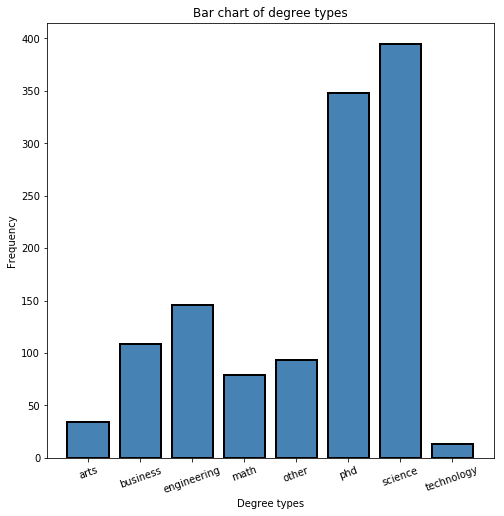

In [35]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
plt.bar(degrees, grouped.values, color="steelblue", linewidth="2", edgecolor='k')
plt.xticks(rotation=20)
plt.xlabel('Degree types')
plt.ylabel('Frequency')
plt.title('Bar chart of degree types')
plt.show()

In [36]:
# Proportions
total = grouped.sum()
business = grouped.loc['business']/total
arts = grouped.loc['arts']/total
engineering = grouped.loc['engineering']/total
math = grouped.loc['math']/total
other = grouped.loc['other']/total
phd = grouped.loc['phd']/total
science = grouped.loc['science']/total
tech = grouped.loc['technology']/total

print("Business: {:.3f}%".format(business*100))
print('Arts: {:.3f}%'.format(arts*100))
print("Engineering: {:.3f}%".format(engineering*100))
print("Math: {:.3f}%".format(math*100))
print("PhD: {:.3f}%".format(phd*100))
print("Science: {:.3f}%".format(science*100))
print("Technology: {:.3f}%".format(tech*100))
print("Others: {:.3f}%".format(other*100))

Business: 8.956%
Arts: 2.794%
Engineering: 11.997%
Math: 6.491%
PhD: 28.595%
Science: 32.457%
Technology: 1.068%
Others: 7.642%


<br/>

<h2>Conclusions</h2>

- Even though most professionals have <b>Master of Science</b> degrees ($32.6\%$), it appears that many professionals also possess <b>PhD's</b> ($28.477\%$).


- Interestingly, only $6.50\%$ of the professionals studied for a <b>Math</b> degree. 


- A substantial percentage ($12.02\%$) of data scientists also possess an <b>Engineering</b> postgraduate degree.


- There are not many data scientists that have a <b>Technology</b> postgraduate degree. Only $1.07\%$ professionals fall in this category.


- Lastly, only $2.798\%$ of professionals have <b>Art</b> postgraduate degrees.